均值: 80.1
标准差: 9.62929557825147
极差: 44
偏度: -0.4681784606491319
峰度: 0.1529409218476565


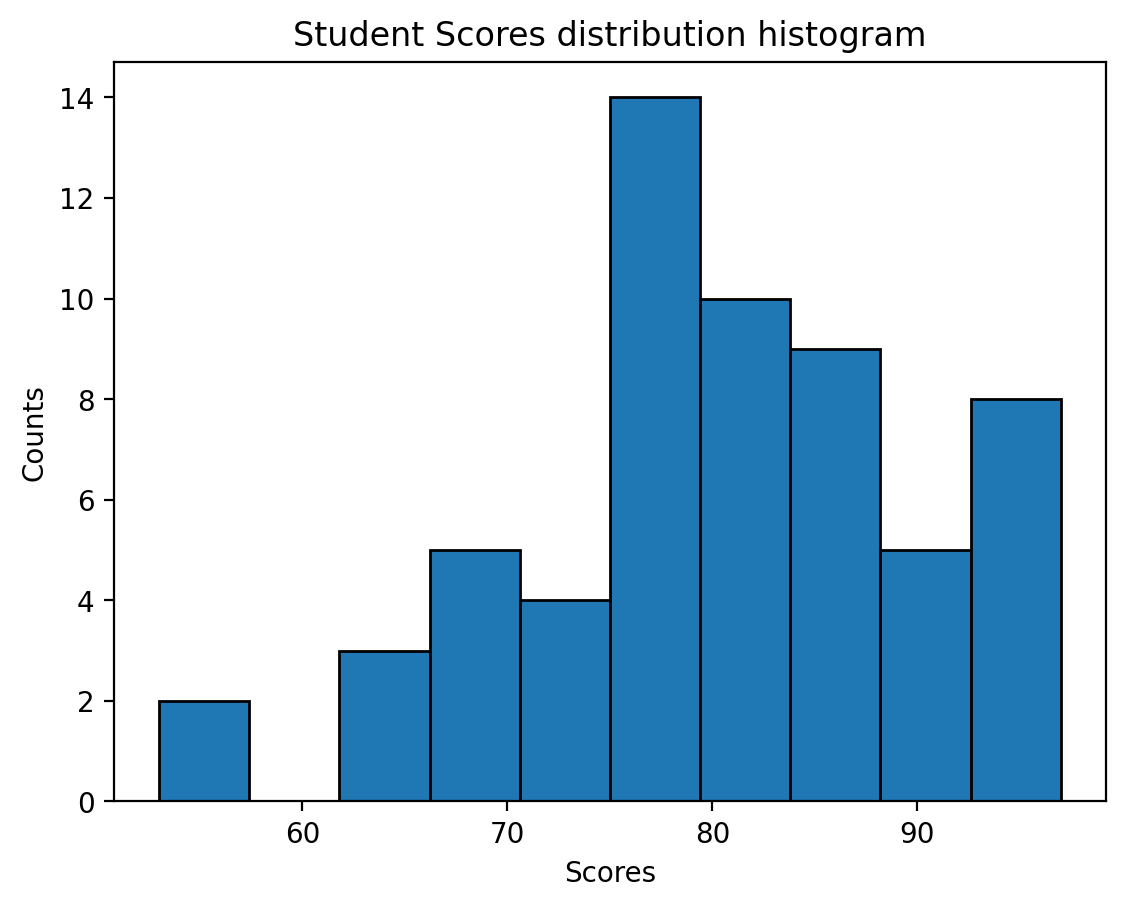


正态性检验结果:
统计量: 2.886116616273061
P值: 0.23620426748340015
成绩分布可能服从正态分布


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 学生成绩数据
scores = np.array([93, 75, 83, 93, 91, 85, 84, 82, 77, 76, 77, 95, 94, 89, 91, 88, 86, 83, 96, 81, 79, 97,
                   78, 75, 67, 69, 68, 84, 83, 81, 75, 66, 85, 70, 94, 84, 83, 82, 80, 78, 74, 73, 76, 70,
                   86, 76, 90, 89, 71, 66, 86, 73, 80, 94, 79, 78, 77, 63, 53, 55])

# 计算均值、标准差、极差、偏度、峰度
mean = np.mean(scores)
std_dev = np.std(scores)
range_score = np.max(scores) - np.min(scores)
skewness = stats.skew(scores)
kurtosis = stats.kurtosis(scores)

print("均值:", mean)
print("标准差:", std_dev)
print("极差:", range_score)
print("偏度:", skewness)
print("峰度:", kurtosis)

# 画直方图
plt.figure(dpi=200)
plt.hist(scores, bins=10, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Counts')
plt.title('Student Scores distribution histogram')
plt.show()

# 正态性检验
statistic, p_value = stats.normaltest(scores)
print("\n正态性检验结果:")
print("统计量:", statistic)
print("P值:", p_value)

if p_value < 0.05:
    print("成绩分布不服从正态分布")
else:
    print("成绩分布可能服从正态分布")


In [5]:
import numpy as np
from scipy import stats

# 一月和二月的汽油价格数据
january_prices = np.array([119, 117, 115, 116, 112, 121, 115, 122, 116, 118, 109, 112, 119, 112, 117, 113, 114, 109, 109, 118])
february_prices = np.array([118, 119, 115, 122, 118, 121, 120, 122, 128, 116, 120, 123, 121, 119, 117, 119, 128, 126, 118, 125])

# 计算均值和标准差
mean_january = np.mean(january_prices)
mean_february = np.mean(february_prices)
std_dev_january = np.std(january_prices, ddof=1)
std_dev_february = np.std(february_prices, ddof=1)

print("一月均值:", mean_january)
print("一月标准差:", std_dev_january)
print("二月均值:", mean_february)
print("二月标准差:", std_dev_february)

# 计算置信区间
confidence_interval_january = stats.t.interval(0.95, len(january_prices) - 1, loc=mean_january, scale=std_dev_january/np.sqrt(len(january_prices)))
confidence_interval_february = stats.t.interval(0.95, len(february_prices) - 1, loc=mean_february, scale=std_dev_february/np.sqrt(len(february_prices)))

print("\n一月汽油价格的置信区间:", confidence_interval_january)
print("二月汽油价格的置信区间:", confidence_interval_february)

# 计算价格差的置信区间
price_diff = february_prices - january_prices
mean_diff = np.mean(price_diff)
std_dev_diff = np.std(price_diff, ddof=1)
confidence_interval_diff = stats.t.interval(0.95, len(price_diff) - 1, loc=mean_diff, scale=std_dev_diff/np.sqrt(len(price_diff)))

print("\n价格差的均值:", mean_diff)
print("价格差的标准差:", std_dev_diff)
print("价格差的置信区间:", confidence_interval_diff)


一月均值: 115.15
一月标准差: 3.869924519867756
二月均值: 120.75
二月标准差: 3.7116459676905724

一月汽油价格的置信区间: (113.33881957294425, 116.96118042705577)
二月汽油价格的置信区间: (119.01289621559044, 122.48710378440956)

价格差的均值: 5.6
价格差的标准差: 5.471457036773948
价格差的置信区间: (3.039279282682204, 8.160720717317796)


In [6]:
import numpy as np
from scipy import stats

# 温度和产量数据
temperature = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
yield_data = np.array([13.2, 15.1, 16.4, 17.1, 17.9, 18.7, 19.6, 21.2, 22.5, 24.3])

# 线性回归
slope, intercept, r_value, p_value, std_err = stats.linregress(temperature, yield_data)

# 打印回归方程
print("回归方程: y = {:.2f}x + {:.2f}".format(slope, intercept))

# 检验回归效果
alpha = 0.05  # 置信水平为95%
if p_value < alpha:
    print("回归效果显著 (p < {:.2f})".format(alpha))
else:
    print("回归效果不显著 (p >= {:.2f})".format(alpha))

# 预测 x=42℃ 时的产量估值和置信区间
x_pred = 42
y_pred = slope * x_pred + intercept
slope_std_err = std_err * np.sqrt(1/len(temperature) + (x_pred - np.mean(temperature))**2 / np.sum((temperature - np.mean(temperature))**2))
t_value = stats.t.ppf(1 - alpha/2, len(temperature) - 2)
confidence_interval = t_value * slope_std_err

print("\n预测 x={}℃ 时的产量估值: {:.2f}".format(x_pred, y_pred))
print("预测区间 (置信度95%): {:.2f} ~ {:.2f}".format(y_pred - confidence_interval, y_pred + confidence_interval))

回归方程: y = 0.22x + 9.12
回归效果显著 (p < 0.05)

预测 x=42℃ 时的产量估值: 18.49
预测区间 (置信度95%): 18.48 ~ 18.50


In [7]:
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

# 养护时间和抗压强度数据
x = np.array([2, 3, 4, 5, 7, 9, 12, 14, 17, 21, 28, 56])
y = np.array([35, 42, 47, 53, 59, 65, 68, 73, 76, 82, 86, 99])

# 定义回归模型 y = a + b ln x
def model(x, a, b):
    return a + b * np.log(x)

# 使用 curve_fit 进行非线性回归
params, covariance = curve_fit(model, x, y)

# 提取回归参数
a, b = params

# 打印回归方程
print("回归方程: y = {:.2f} + {:.2f}ln(x)".format(a, b))


回归方程: y = 21.01 + 19.53ln(x)


C:\Users\Carl0\.conda\envs\carlpython\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Carl0\.conda\envs\carlpython\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


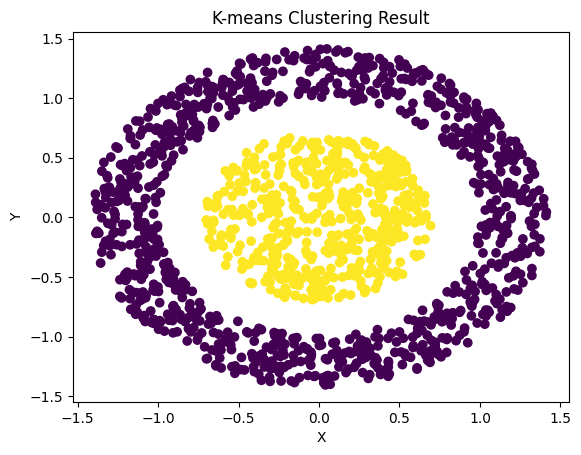

In [11]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 从 MATLAB 文件中加载数据
data = scio.loadmat('L6data.mat')['X']

def change_polar(coords):
    radius = np.sqrt(coords[:, 0]**2 + coords[:, 1]**2)
    angle = np.arctan2(coords[:, 1], coords[:, 0])
    return np.vstack((radius, angle)).T

polar_coords = change_polar(data)

# 仅使用径向距离 radius 作为特征进行聚类
radius_data = polar_coords[:, 0].reshape(-1, 1)

num_clusters = 2
kmeans_model = KMeans(n_clusters=num_clusters, random_state=0).fit(radius_data)
cluster_labels = kmeans_model.labels_

# 可视化聚类结果
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, dpi=200)
plt.title('K-means Clustering Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



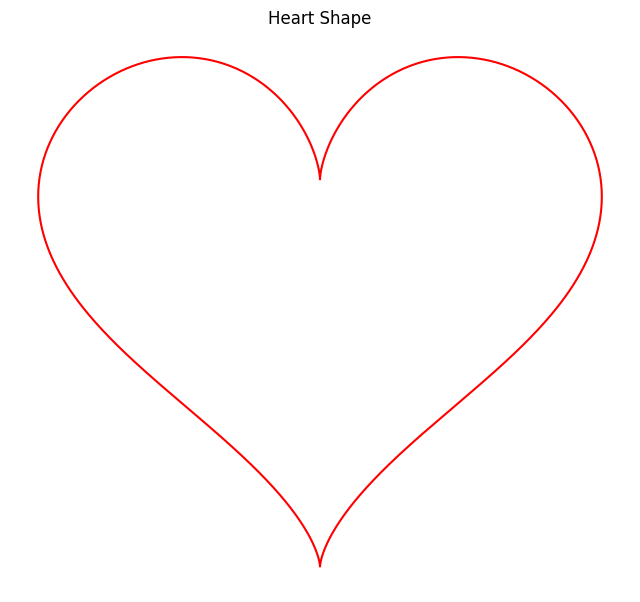

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义心形曲线的方程
t = np.linspace(0, 2 * np.pi, 1000)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

# 创建绘图
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'r')

# 设置图形属性
plt.title("Heart Shape")
plt.gca().set_aspect('equal')
plt.gca().axis('off')  # 关闭坐标轴

# 显示图形
plt.show()


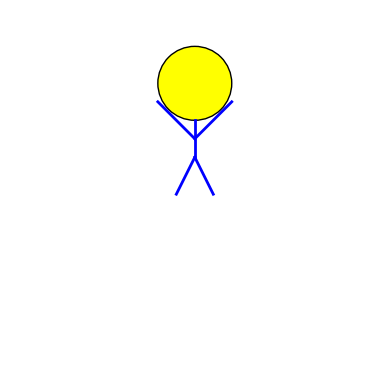

In [2]:
import matplotlib.pyplot as plt

# 创建一个新图形
fig, ax = plt.subplots()

# 绘制头部
head = plt.Circle((0.5, 0.8), 0.1, color='yellow', ec='black')
ax.add_patch(head)

# 绘制身体
body = plt.Line2D([0.5, 0.5], [0.6, 0.7], lw=2, color='blue')
ax.add_line(body)

# 绘制手臂
left_arm = plt.Line2D([0.5, 0.4], [0.65, 0.75], lw=2, color='blue')
right_arm = plt.Line2D([0.5, 0.6], [0.65, 0.75], lw=2, color='blue')
ax.add_line(left_arm)
ax.add_line(right_arm)

# 绘制腿
left_leg = plt.Line2D([0.5, 0.45], [0.6, 0.5], lw=2, color='blue')
right_leg = plt.Line2D([0.5, 0.55], [0.6, 0.5], lw=2, color='blue')
ax.add_line(left_leg)
ax.add_line(right_leg)

# 设置图形属性
ax.set_aspect('equal')
ax.axis('off')

# 显示图形
plt.show()
